Распознавание рукописных цифр

In [54]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [55]:
# Загрузка обучающих и тестовых изображений
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Чтобы входные параметры находились в пределах от 0 до 1 мы производим стандартизацию данных
255 - максимальное значение 
0 - минимальное значение

y_train_cat и y_test_cat - это подготовленного вида данные:
y_train = 5 -> y_train_cat = [0,0,0,0,0,1,0,0,0,0]
y_train = 0 -> y_train_cat = [1,0,0,0,0,0,0,0,0,0]

y_train_cat = keras.utils.to_categorical(y_train, 10) - это 
представление y_train в такой векетр длины 10

In [67]:
# стандартизация входных данных
x_train = x_train / 255 
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

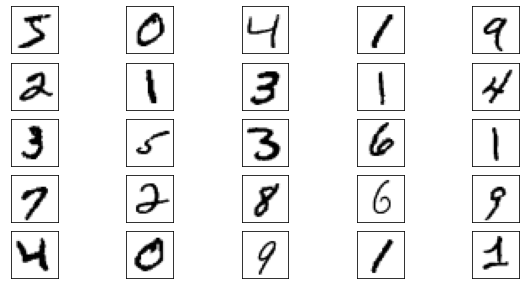

In [57]:

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Формирование модели НС и вывод ее структуры в консоль

In [59]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), # входной слой
    Dense(200, activation='relu'), # скрытый слой
    Dense(10, activation='softmax') # выходной слой
])

print(model.summary())      # вывод структуры НС в консоль

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 200)               157000    
                                                                 
 dense_17 (Dense)            (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


Param - это веса, которые настраиваются в процессе обучения
(784 входа + 1 bios)*128 скрытых нейронов =  100480 связей, которые мы молжны 
подстраивать для выходного слоя (весов)
(128 нейронов + 1 bios)*10 выходов = 1290 весов

In [60]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy', # т.к больше чем 2 класса
             metrics=['accuracy'])

Метрика - accuracy = точность 

Запуск процесса обучения

batch_size - размер батча
validation_split - разбиение обучающей выборка на обучающую и проверучную
-> 0.2обучающей выборки переходит в выборку валидации

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2627 - accuracy: 0.9238 - val_loss: 0.1409 - val_accuracy: 0.9588
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1118 - accuracy: 0.9665 - val_loss: 0.1023 - val_accuracy: 0.9697
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0746 - accuracy: 0.9776 - val_loss: 0.0930 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0894 - val_accuracy: 0.9737
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0394 - accuracy: 0.9880 - val_loss: 0.0931 - val_accuracy: 0.9728


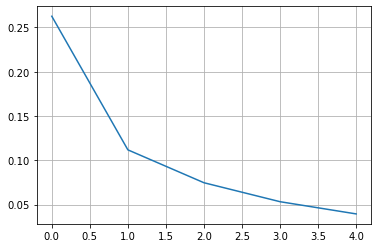

In [61]:
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)
plt.plot(history.history['loss']) # 2й history - словарь, loss - критерий качества
#, вычисленный для каждой эпохи
plt.grid(True)
plt.show()

Подача тестовой выборки в программу

In [62]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9723


[0.08641084283590317, 0.9722999930381775]

Проверка распознавания цифр

[[9.9996388e-01 8.4154967e-09 1.8020138e-07 6.2267553e-08 2.2364771e-10
  1.7570531e-09 2.8524988e-05 6.7271703e-06 1.4086760e-10 6.5547766e-07]]
Распознанная цифра: 0


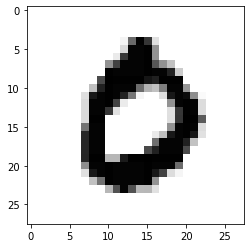

In [63]:
n = 3
x = np.expand_dims(x_test[n], axis=0) # создание трехмерного тензора, т.к predict ждет 
# данные именно в таком формате. axis = 0 - добавляет еще одну ось
res = model.predict(x) # подает в НС изображение и получаем 10 выходов
print( res )
# argmax() - индекс максимального значения среди всех выходов
print(f"Распознанная цифра: {np.argmax(res)}" ) 

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Выделим все неверные результаты

In [68]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test) # 10000 векторов из 10 значений
pred = np.argmax(pred, axis=1) # 10000 значений, которые являются числом

print(pred.shape)

print(pred[:20]) # первые 20 предсказанных чисел
print(y_test[:20]) # реальные первые 20 чисел

(10000,)
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [47]:
# Выделение неверных вариантов
mask = pred == y_test # формируем маску. Где сравненные значения равны -> True
# если не равны -> False
print(mask[:10]) #

x_false = x_test[~mask] # только те, что со значением false
p_false = pred[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(890, 28, 28)


Значение сети: 6
Значение сети: 0
Значение сети: 3
Значение сети: 4
Значение сети: 2
Значение сети: 7
Значение сети: 7
Значение сети: 4
Значение сети: 1
Значение сети: 9
Значение сети: 9
Значение сети: 3
Значение сети: 5
Значение сети: 7
Значение сети: 5
Значение сети: 7
Значение сети: 7
Значение сети: 8
Значение сети: 5
Значение сети: 2
Значение сети: 0
Значение сети: 4
Значение сети: 3
Значение сети: 6
Значение сети: 9


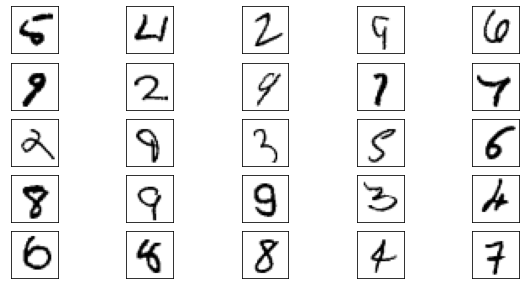

In [48]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    print("Значение сети: " + str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()